<a href="https://colab.research.google.com/github/Catia2021/Projeto5-MachineLearning_Dados_de_Credito/blob/main/MachineLearningDadosCredito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tema do Projeto: Compras via Cartão de Crédito


#Apresentação dos Dados

**Neste estudo serão utilizados dados coletados do repositório Kaggle disponibilizados no seguinte link: (https://www.kaggle.com/sakshigoyal7/credit-card-customers).**

Com base neste dataset, será feito um modelo preditivo de padrão de uso de cartão de crédito.


#Problema a ser resolvido

**Identificar algum tipo de padrão no dataset**

# Objetivos do Projeto


*  Instalar  e importar  bibliotecas  apropriadas
*  Pré-processar os dados
*  Realizar  tratamento de atributos categóricos usando o LabelEncoder 
*   Escalonar os Atributos
*   Usar a técnica WCSS
*   Treinar o algoritimo K-Means
*   Proceder a Redução de Dimensionalidade  se necessário
*   Visualização dos Clusters





#Importando Bibliotecas e Dados

In [ ]:
! pip install pyod

In [ ]:
!pip  install plotly --upgrade

In [3]:
import pandas as pd  # biblioteca para manipulação de dados
import numpy as np # biblioteca para manipulação de  dados numéricos
import seaborn as sns # biblioteca para otimizar gráficos
import matplotlib.pyplot as plt # biblioteca para geração de gráficos
import plotly.express as px  # biblioteca para geração de gráficos interativos
import sklearn # bilioteca para subsidiar Machine Learning
import plotly.graph_objects as go # para concatenar graficos
from sklearn.preprocessing import StandardScaler #para escalonar variaveis
from sklearn.preprocessing import LabelEncoder #para transformar  variaveis
from sklearn.cluster import KMeans #  para  usar o Kmeans
from sklearn.compose import ColumnTransformer #para transformar variaveis
from sklearn.decomposition import PCA #para redução de dimensionalidade
import pickle
from sklearn.metrics import classification_report
from numpy.ma.core import filled
from IPython.core.pylabtools import figsize
from seaborn.categorical import boxplot
% matplotlib inline
from pyod. models.knn import KNN


In [4]:
from google.colab import files
uploaded = files.upload()

Saving BankChurners.csv to BankChurners.csv


#Processamento dos Dados

In [5]:
DadosCreditos = pd.read_csv ('/content/BankChurners.csv')

In [6]:
print( ' Este dataset tem %s linhas e %s colunas' % (DadosCreditos.shape[0] , DadosCreditos.shape[1] ) )
DadosCreditos.head()

 Este dataset tem 10127 linhas e 21 colunas


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


**Acima você pode conferir as primeiras linhas do dataset e o total de linhas e colunas. Como os dados podem causar certa confusão, será alterado o idioma dos registros e cabeçalhos das colunas assim como a remoção de algumas colunas que não serão necessárias para o Projeto.**

In [7]:
DadosCreditos.drop(['CLIENTNUM', 'Attrition_Flag', 'Months_on_book','Total_Relationship_Count', 'Months_Inactive_12_mon',
                    'Contacts_Count_12_mon','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct', 
                    'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio'], axis =1, inplace =True)

**Renomeando as Colunas**

In [8]:
DadosCreditos.columns = ['Idade do Cliente','Sexo',' Número de Dependentes','Nivel de Escolaridade','Estado Civil','Categoria de Renda','Categoria do Cartão','Limite do Cartão']

In [9]:
DadosCreditos.tail()

,Idade do Cliente,Sexo,Número de Dependentes,Nivel de Escolaridade,Estado Civil,Categoria de Renda,Categoria do Cartão,Limite do Cartão
10122,50,M,2,Graduate,Single,$40K - $60K,Blue,4003.0
10123,41,M,2,Unknown,Divorced,$40K - $60K,Blue,4277.0
10124,44,F,1,High School,Married,Less than $40K,Blue,5409.0
10125,30,M,2,Graduate,Unknown,$40K - $60K,Blue,5281.0
10126,43,F,2,Graduate,Married,Less than $40K,Silver,10388.0


**Continuando a tratamento dos dados, será renomeado os registros das colunas Nível de Escolaridade, Estado Civil, Categoria de Renda e Categoria do Cartão para melhor compreensão. Antes de renomear, será necessário, verificar os registros que serão alterados. Para isto , usaremos a função unique.**

In [10]:
np.unique (DadosCreditos['Nivel de Escolaridade'])

array(['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate',
       'Uneducated', 'Unknown'], dtype=object)

In [11]:
np.unique (DadosCreditos['Estado Civil'])

array(['Divorced', 'Married', 'Single', 'Unknown'], dtype=object)

In [12]:
np.unique (DadosCreditos['Categoria de Renda'])

array(['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K',
       'Less than $40K', 'Unknown'], dtype=object)

In [13]:
np.unique (DadosCreditos['Categoria do Cartão'])

array(['Blue', 'Gold', 'Platinum', 'Silver'], dtype=object)

In [14]:
DadosCreditos ['Nivel de Escolaridade']= DadosCreditos ['Nivel de Escolaridade']. replace ( ['Graduate','Unknown','High School','Uneducated',
                                                                                             'College','Doctorate', ' Post-Graduate'], ['Graduação','Não Informado','Ensino Medio','Alfabetizado','Escola Tecnica','Doutorado',' Pos-Doutorado'])

In [15]:
DadosCreditos ['Estado Civil']= DadosCreditos ['Estado Civil']. replace ( ['Divorced', 'Married', 'Single', 'Unknown'], [ 'Divorciado', 'Casado','Solteiro','Não Informado'])

In [16]:
DadosCreditos ['Categoria do Cartão']= DadosCreditos ['Categoria do Cartão']. replace ( ['Blue', 'Gold', 'Platinum', 'Silver'], [ 'Azul', 'Ouro','Platina','Prata' ])

In [17]:
DadosCreditos ['Categoria de  Renda']= DadosCreditos ['Categoria de Renda']. replace ( ['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K',
       'Less than $40K', 'Unknown'], [ '+ de 120mil dolares', ' entre 40 e 60 mil dolares', 'entre 60 e  80 mil dolares', ' entre 80 e 120 mil dolares',
       '- que 40 mil dolares', 'Não Informado'])

In [ ]:
DadosCreditos.head(10)

In [19]:
DadosCreditos.drop(['Categoria de Renda'], axis =1, inplace =True)

**Como observado na tabela acima, foi mantida a coluna Categoria de Renda com registros em inglês, e acrescentado coluna Categoria de Renda com registros em português. Para não haver colunas repetidas, foi deletada a coluna original,como visto abaixo.**

In [20]:
DadosCreditos.head()

,Idade do Cliente,Sexo,Número de Dependentes,Nivel de Escolaridade,Estado Civil,Categoria do Cartão,Limite do Cartão,Categoria de Renda
0,45,M,3,Ensino Medio,Casado,Azul,12691.0,entre 60 e 80 mil dolares
1,49,F,5,Graduação,Solteiro,Azul,8256.0,- que 40 mil dolares
2,51,M,3,Graduação,Casado,Azul,3418.0,entre 80 e 120 mil dolares
3,40,F,4,Ensino Medio,Não Informado,Azul,3313.0,- que 40 mil dolares
4,40,M,3,Alfabetizado,Casado,Azul,4716.0,entre 60 e 80 mil dolares


**Vejamos um Resumo do Dataset**

In [21]:
DadosCreditos.describe()

,Idade do Cliente,Número de Dependentes,Limite do Cartão
count,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,8631.953698
std,8.016814,1.298908,9088.776650
min,26.000000,0.000000,1438.300000
25%,41.000000,1.000000,2555.000000
50%,46.000000,2.000000,4549.000000
75%,52.000000,3.000000,11067.500000
max,73.000000,5.000000,34516.000000


**Como se observa, o mínimo de dependentes é zero e o máximo 5. Sendo a média de 2 dependentes. Já a idade máxima observada é de 73 anos e a minima de 26 anos.**

**Após este processamento inicial será caracterizado os tipos de variáveis e seus significados.**

In [22]:
DadosCreditos.dtypes

Idade do Cliente            int64
Sexo                       object
 Número de Dependentes      int64
Nivel de Escolaridade      object
Estado Civil               object
Categoria do Cartão        object
Limite do Cartão          float64
Categoria de  Renda        object
dtype: object

**Se tem, portanto, 3 variáveis Numéricas e 5 Categóricas, assim classificadas:**

    Idade e Número de Dependentes: Numérica Discreta

    Limite do Cartão: Numérica Contínua

    Sexo, Estado Civil : Categórica Nominal

    Nível de Escolaridade, Categoria do Cartão,Categoria de Renda: Categórica Ordinal 



**Antes de proceder a Análise de Valores Nulos e de Valores Inconsistentes, se faz importante explicar o significado de cada variável**

**Dicionário de Dados**

    **Idade**: Idade do cliente durante a análise
    **Número de Dependentes**: Dependentes que o cliente possui
    **Limite do cartão**: Limite financeiro para realizar compras
    **Sexo**: Sexo
    **Nivel de Escolaridade**: Nível de instrução formal
    **Categoria do Cartão**: Categoria do cartão de acordo com critérios do banco
    **Categoria de Renda**: Distribuição da renda financeira do cliente por grupos
    **Estado Civil** : Estado civil







**Prosseguindo o processamento de dados, será analisado se há valores faltantes e inconsistentes**

In [23]:
DadosCreditos.isnull()

,Idade do Cliente,Sexo,Número de Dependentes,Nivel de Escolaridade,Estado Civil,Categoria do Cartão,Limite do Cartão,Categoria de Renda
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
10122,False,False,False,False,False,False,False,False
10123,False,False,False,False,False,False,False,False
10124,False,False,False,False,False,False,False,False
10125,False,False,False,False,False,False,False,False


In [25]:
DadosCreditos.isnull().sum()

Idade do Cliente          0
Sexo                      0
 Número de Dependentes    0
Nivel de Escolaridade     0
Estado Civil              0
Categoria do Cartão       0
Limite do Cartão          0
Categoria de  Renda       0
dtype: int64

In [24]:
DadosCreditos.loc[DadosCreditos['Idade do Cliente']<0]

,Idade do Cliente,Sexo,Número de Dependentes,Nivel de Escolaridade,Estado Civil,Categoria do Cartão,Limite do Cartão,Categoria de Renda


In [26]:
DadosCreditos.loc[DadosCreditos['Limite do Cartão']<=0]

,Idade do Cliente,Sexo,Número de Dependentes,Nivel de Escolaridade,Estado Civil,Categoria do Cartão,Limite do Cartão,Categoria de Renda


In [27]:
DadosCreditos.loc[DadosCreditos[' Número de Dependentes']<0]

,Idade do Cliente,Sexo,Número de Dependentes,Nivel de Escolaridade,Estado Civil,Categoria do Cartão,Limite do Cartão,Categoria de Renda


In [28]:
np.unique(DadosCreditos['Limite do Cartão'],return_counts=True)

(array([ 1438.3,  1439. ,  1440. , ..., 34458. , 34496. , 34516. ]),
 array([507,   2,   1, ...,   1,   1, 508]))

In [29]:
np.unique(DadosCreditos['Idade do Cliente'],return_counts=True)

(array([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
        43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
        60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 73]),
 array([ 78,  32,  29,  56,  70,  91, 106, 127, 146, 184, 221, 260, 303,
        333, 361, 379, 426, 473, 500, 486, 490, 479, 472, 495, 452, 398,
        376, 387, 307, 279, 262, 223, 157, 157, 127,  93,  93,  65,  43,
        101,   2,   4,   2,   1,   1]))

In [30]:
np.unique(DadosCreditos[' Número de Dependentes'],return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([ 904, 1838, 2655, 2732, 1574,  424]))

**Não foram observados valores inconsistentes ou faltantes nos registros, porém, há registros  desbalanceados  que não serão tratados neste projeto. Agora, serão feitas as Visualizações gráficas, que ajudam a identificar,também, existência de valores inconsistentes.**

#Visualizando Gráficos

In [31]:
EstadoCivil = DadosCreditos['Estado Civil'].value_counts()

In [ ]:
EstadoCivil

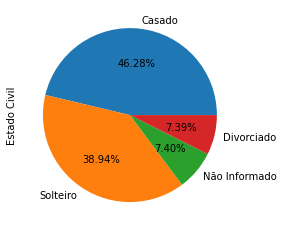

In [33]:
EstadoCivil.plot(kind='pie', autopct='%1.2f%%')

In [ ]:
sexo = DadosCreditos['Sexo'].value_counts()
sexo

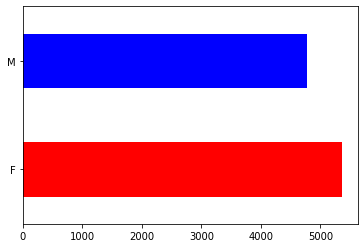

In [35]:
sexo.plot(kind='barh', color = ['red', 'blue'])

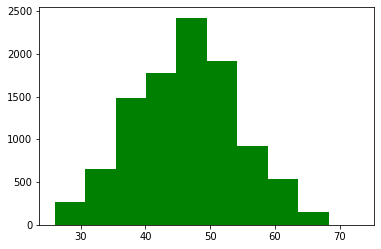

In [36]:
plt.hist(x= DadosCreditos['Idade do Cliente'], color= 'green');

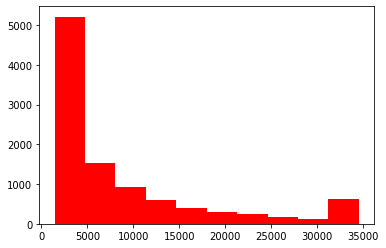

In [37]:
plt.hist(x= DadosCreditos['Limite do Cartão'],color='red');

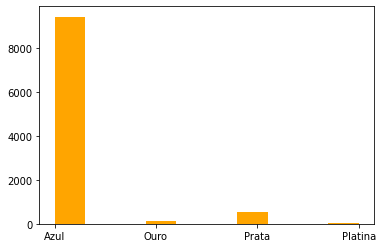

In [38]:
plt.hist(x= DadosCreditos['Categoria do Cartão'], color='orange');

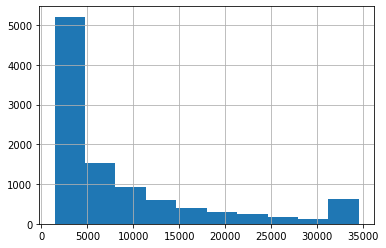

In [39]:
DadosCreditos['Limite do Cartão'].hist()

In [40]:
Numero_Dependentes = DadosCreditos[' Número de Dependentes'].value_counts()

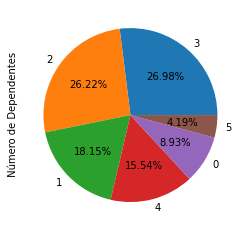

In [41]:
Numero_Dependentes.plot(kind='pie', autopct='%1.2f%%')

In [42]:
Nivel_de_Escolaridade = DadosCreditos['Nivel de Escolaridade'].value_counts()

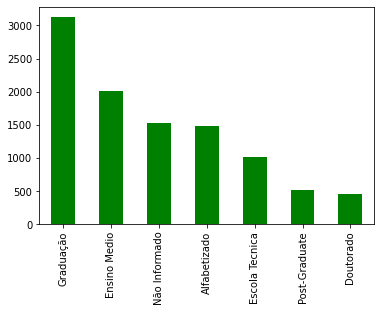

In [43]:
Nivel_de_Escolaridade.plot(kind='bar', color='green')

In [ ]:
CategoriaRenda = DadosCreditos['Categoria de  Renda'].value_counts()
CategoriaRenda

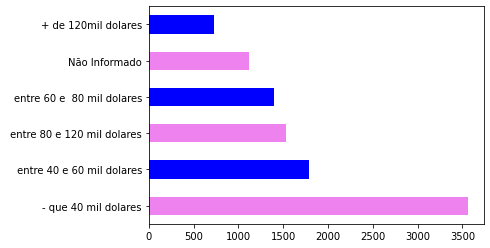

In [45]:
CategoriaRenda.plot(kind='barh', color = ['violet', 'blue'])

**Se pode perceber  que há predomínio de casados e solteiros, a quantidade de homens e mulheres  se equivalem, a média de idade  fica entre 40 a 55 anos,o limite do cartão é predominantemente até uns 5 mil dólares, de  1  a 4 filhos é o padrão, a  graduação e  nível médio é o visto em maior  quantidades , o ganho de menos  de 40 mil dólares é também o padrão assim como a categoria azul.Não foram visualizados  valores  inconsistentes.**

**Verificando se há Outliers.**

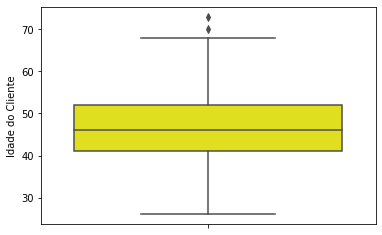

In [46]:
sns.boxplot(y='Idade do Cliente',data= DadosCreditos,color='yellow');

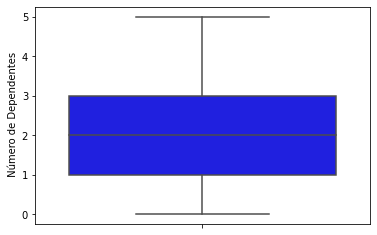

In [47]:
sns.boxplot(y=' Número de Dependentes',data= DadosCreditos,color='blue');

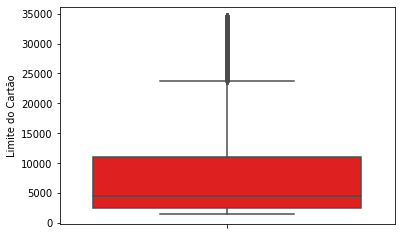

In [48]:
sns.boxplot(y='Limite do Cartão',data= DadosCreditos,color='red');

In [49]:
grafico= px.scatter(x=DadosCreditos['Idade do Cliente'], y=DadosCreditos['Limite do Cartão'])


In [50]:
grafico.show()

In [51]:
grafico= px.scatter(x=DadosCreditos[' Número de Dependentes'], y=DadosCreditos['Limite do Cartão'])
grafico.show()


In [52]:
grafico= px.scatter(x=DadosCreditos['Idade do Cliente'], y=DadosCreditos['Limite do Cartão'])
grafico.show()


**Comparando os  gráficos boxplot e os de dispersão, se percebe que os outliers observados nos boxplot não são relevantes. Portanto não será preciso tratar os dados. Mas,ainda será feito uma análise utilizando a biblioteca pyod.**

In [53]:
detector = KNN()
detector.fit(DadosCreditos.iloc[:,[0,6]])

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [54]:
previsores = detector.labels_
previsores

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
np.unique( previsores,return_counts=True)

(array([0, 1]), array([9116, 1011]))

**Foram detectados 1011 outliers. O número 0 representa a não presença de outliers e o 1 a presença.Porém pela análise gráfica, não são relevante estes registros.**

**Verificando a confiabilidade dos previsores.**

In [56]:
confianca_previsoes = detector.decision_scores_
confianca_previsoes

array([20.        ,  8.06225775,  5.09901951, ..., 11.40175425,
       18.11077028, 17.20465053])

In [57]:
outliers =[]
for i in range(len(previsores)):
   if previsores[i]== 1:
     outliers.append(i)

In [58]:
print(outliers)

[7, 8, 16, 17, 42, 48, 53, 54, 64, 69, 73, 74, 79, 91, 109, 115, 118, 126, 147, 150, 151, 152, 158, 162, 168, 170, 176, 178, 191, 193, 197, 209, 214, 225, 231, 233, 239, 248, 256, 262, 271, 286, 294, 305, 307, 319, 348, 378, 379, 396, 397, 404, 407, 414, 421, 424, 426, 427, 432, 436, 438, 450, 453, 456, 459, 461, 463, 464, 465, 466, 471, 473, 479, 482, 490, 491, 496, 501, 504, 511, 519, 531, 541, 553, 555, 557, 570, 571, 577, 595, 599, 609, 615, 616, 625, 626, 635, 640, 651, 652, 653, 660, 664, 675, 688, 690, 692, 714, 724, 731, 739, 749, 758, 768, 769, 784, 788, 793, 800, 809, 827, 839, 842, 847, 868, 880, 894, 905, 911, 917, 926, 932, 946, 956, 966, 969, 973, 974, 998, 1007, 1027, 1045, 1057, 1062, 1080, 1099, 1131, 1132, 1138, 1144, 1163, 1165, 1188, 1192, 1198, 1204, 1228, 1229, 1236, 1266, 1278, 1293, 1325, 1326, 1342, 1364, 1368, 1376, 1377, 1397, 1402, 1416, 1422, 1432, 1459, 1461, 1468, 1469, 1478, 1490, 1516, 1518, 1526, 1532, 1534, 1543, 1549, 1553, 1564, 1591, 1641, 1642, 16

**Estes são os indices que se encontram os outliers.**

#Preparando o Banco de Dados para Análise do Algoritmo

**Inicialmente  será feito  uma  cópia  do  Dataset **

In [59]:
DadosCreditos11 = DadosCreditos.copy()

In [60]:
DadosCreditos11.head()

,Idade do Cliente,Sexo,Número de Dependentes,Nivel de Escolaridade,Estado Civil,Categoria do Cartão,Limite do Cartão,Categoria de Renda
0,45,M,3,Ensino Medio,Casado,Azul,12691.0,entre 60 e 80 mil dolares
1,49,F,5,Graduação,Solteiro,Azul,8256.0,- que 40 mil dolares
2,51,M,3,Graduação,Casado,Azul,3418.0,entre 80 e 120 mil dolares
3,40,F,4,Ensino Medio,Não Informado,Azul,3313.0,- que 40 mil dolares
4,40,M,3,Alfabetizado,Casado,Azul,4716.0,entre 60 e 80 mil dolares


#Tratando atributos Categóricos com Label Encoder

In [61]:
X_DadosCreditos = DadosCreditos11.iloc[:,0:8].values

In [62]:
X_DadosCreditos

array([[45, 'M', 3, ..., 'Azul', 12691.0, 'entre 60 e  80 mil dolares'],
       [49, 'F', 5, ..., 'Azul', 8256.0, '- que 40 mil dolares'],
       [51, 'M', 3, ..., 'Azul', 3418.0, ' entre 80 e 120 mil dolares'],
       ...,
       [44, 'F', 1, ..., 'Azul', 5409.0, '- que 40 mil dolares'],
       [30, 'M', 2, ..., 'Azul', 5281.0, ' entre 40 e 60 mil dolares'],
       [43, 'F', 2, ..., 'Prata', 10388.0, '- que 40 mil dolares']],
      dtype=object)

In [63]:
label_encoder_Nivel_de_Escolaridade = LabelEncoder()
label_encoder_Estado_Civil = LabelEncoder()
label_encoder_Categoria_de_Renda = LabelEncoder()
label_encoder_Sexo = LabelEncoder()
label_encoder_Categoria_do_Cartão = LabelEncoder()

In [64]:
X_DadosCreditos[:,1]=label_encoder_Sexo.fit_transform(X_DadosCreditos[:,1])
X_DadosCreditos[:,3]=label_encoder_Nivel_de_Escolaridade.fit_transform(X_DadosCreditos[:,3])
X_DadosCreditos[:,4]=label_encoder_Estado_Civil.fit_transform(X_DadosCreditos[:,4])
X_DadosCreditos[:,5]=label_encoder_Categoria_do_Cartão.fit_transform(X_DadosCreditos[:,5])
X_DadosCreditos[:,7]=label_encoder_Categoria_de_Renda.fit_transform(X_DadosCreditos[:,7])



In [65]:
X_DadosCreditos

array([[45, 1, 3, ..., 0, 12691.0, 5],
       [49, 0, 5, ..., 0, 8256.0, 3],
       [51, 1, 3, ..., 0, 3418.0, 1],
       ...,
       [44, 0, 1, ..., 0, 5409.0, 3],
       [30, 1, 2, ..., 0, 5281.0, 0],
       [43, 0, 2, ..., 3, 10388.0, 3]], dtype=object)

#Escalonando os Atributos

In [66]:
X_DadosCreditos[:,0].min()

26

In [67]:
X_DadosCreditos[:,0].max()

73

In [68]:
X_DadosCreditos[:,1].min()

0

In [69]:
X_DadosCreditos[:,1].max()

1

**Por estes dados já se  vê que há dados discrepantes e   será feito a Padronização.**

In [70]:
scaler_DadosCreditos = StandardScaler()
X_DadosCreditos = scaler_DadosCreditos.fit_transform(X_DadosCreditos)

In [71]:
X_DadosCreditos

array([[-0.16540558,  1.05995565,  0.50336813, ..., -0.25947328,
         0.4466219 ,  1.54315661],
       [ 0.33357038, -0.9434357 ,  2.04319867, ..., -0.25947328,
        -0.04136665,  0.31770694],
       [ 0.58305837,  1.05995565,  0.50336813, ..., -0.25947328,
        -0.5736978 , -0.90774274],
       ...,
       [-0.29014957, -0.9434357 , -1.03646242, ..., -0.25947328,
        -0.3546256 ,  0.31770694],
       [-2.03656544,  1.05995565, -0.26654715, ..., -0.25947328,
        -0.36870959, -1.52046758],
       [-0.41489356, -0.9434357 , -0.26654715, ...,  4.06949863,
         0.19321995,  0.31770694]])

# Utilizando a Técnica WCSS

In [72]:
wcss=[]
for i in range (1,6):
# print(i)
    Kmeans_Credito = KMeans(n_clusters=i,random_state=0)
    Kmeans_Credito.fit(X_DadosCreditos)

In [73]:
wcss.append(Kmeans_Credito.inertia_)

In [74]:
wcss

[48226.493985860034]

**Foi sugerido se ter apenas 1 cluster, mas  será  posto 2 clusters.**

# Treinando o Algoritmo

In [75]:
Kmeans_Credito=KMeans(n_clusters=2,random_state=0)
rotulos= Kmeans_Credito.fit_predict(X_DadosCreditos)

In [76]:
rotulos

array([1, 0, 1, ..., 0, 1, 1], dtype=int32)

**Como se tem muitos  atributos, será aplicado a técnica PCA, para  redução de dimensionalidade.**

In [77]:
pca= PCA(n_components=2)
X_DadosCreditos_pca=  pca.fit_transform(X_DadosCreditos)

In [78]:
X_DadosCreditos_pca.shape

(10127, 2)

In [79]:
X_DadosCreditos_pca

array([[ 0.47742415, -0.37792911],
       [-0.40008171, -1.37906543],
       [ 0.04371034,  0.17901501],
       ...,
       [-1.02453663,  0.44781699],
       [ 0.39402447, -1.09859479],
       [ 1.73039719, -0.26201236]])

**Visualizando os clusters**

In [80]:
grafico= px.scatter(x= X_DadosCreditos_pca[:,0],y=X_DadosCreditos_pca[:,1], color= rotulos)
grafico.show()

**Gerando Lista dos Atributos  por Cluster**

In [81]:
lista=np.column_stack((DadosCreditos11,rotulos))
lista= lista[lista[:,8]. argsort()]
lista

array([[51, 'F', 2, ..., 8365.0, 'Não Informado', 0],
       [34, 'F', 4, ..., 5021.0, '- que 40 mil dolares', 0],
       [40, 'F', 4, ..., 2558.0, '- que 40 mil dolares', 0],
       ...,
       [48, 'M', 4, ..., 22917.0, ' entre 80 e 120 mil dolares', 1],
       [47, 'M', 4, ..., 3402.0, ' entre 40 e 60 mil dolares', 1],
       [43, 'F', 2, ..., 10388.0, '- que 40 mil dolares', 1]],
      dtype=object)

#Concluindo

**O Algoritmo  só formou um cluster o que indica  que  houve dificuldade de achar semelhanças entre os  registros. Mas, foi  feito a divisão para  dois clusters e o que  se observou é  um agrupamento viável. Posteriormente, é importante analisar o banco de dados com outros algoritmos.**